# TAREA 1
Blanca Cecilia Ubaque - 201725992

María Carolina Trespalacios – 200313688

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [192]:
from math import pi
def mult_dec_pi(a, b):
    pi
    lista=[int(i) if i.isdigit() else i for i in map(str, str(pi))]
    i=1+a
    n=lista[i]
    j=1+b
    m=lista[j]
    result=n*m
    return result

In [193]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [194]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [195]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [196]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [197]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

IndexError: list index out of range

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

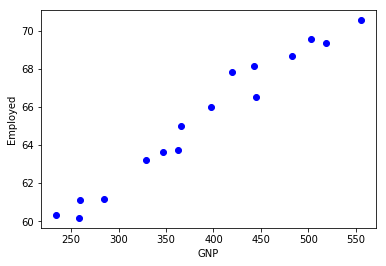

In [198]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [199]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('C:/Users/tresp/AppData/Local/Temp/Temp1_AppliedDeepLearningClass-master.zip/AppliedDeepLearningClass-master/datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [200]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [201]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [202]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

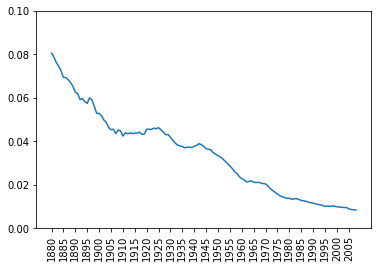

In [203]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

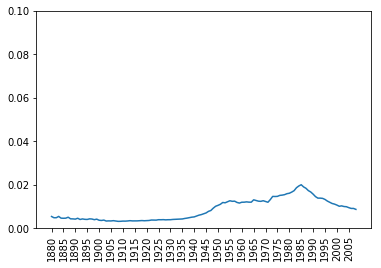

In [204]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [205]:
boys['decade']=0
boys['decade'].describe()

count    129000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: decade, dtype: float64

In [206]:
boys.head()

,year,name,prop,sex,soundex,decade
0,1880,John,0.081541,boy,J500,0
1,1880,William,0.080511,boy,W450,0
2,1880,James,0.050057,boy,J520,0
3,1880,Charles,0.045167,boy,C642,0
4,1880,George,0.043292,boy,G620,0


In [207]:
# Se asigna un valor a la variable década dependiendo del año
boys.loc[boys.year.between (1880,1889, inclusive=True),'decade']=1880
boys.loc[boys.year.between (1890,1899, inclusive=True),'decade']=1890
boys.loc[boys.year.between (1900,1909, inclusive=True),'decade']=1900
boys.loc[boys.year.between (1910,1919, inclusive=True),'decade']=1910
boys.loc[boys.year.between (1920,1929, inclusive=True),'decade']=1920
boys.loc[boys.year.between (1930,1939, inclusive=True),'decade']=1930
boys.loc[boys.year.between (1940,1949, inclusive=True),'decade']=1940
boys.loc[boys.year.between (1950,1959, inclusive=True),'decade']=1950
boys.loc[boys.year.between (1960,1969, inclusive=True),'decade']=1960
boys.loc[boys.year.between (1970,1979, inclusive=True),'decade']=1970
boys.loc[boys.year.between (1980,1989, inclusive=True),'decade']=1980
boys.loc[boys.year.between (1990,1999, inclusive=True),'decade']=1990
boys.loc[boys.year.between (2000,2009, inclusive=True),'decade']=2000

In [208]:
# Se tabula por cada década la frecuencia de cada nombre
table=pd.crosstab(index=boys.decade, columns=boys.name)
table

name,Aaden,Aarav,Aaron,Ab,Abb,Abbie,Abbott,Abdiel,Abdul,Abdullah,...,Zeb,Zebulon,Zechariah,Zed,Zeke,Zenas,Zeno,Zigmund,Zion,Zollie
decade,,,,,,,,,,,,,,,,,,,,,
1880,0,0,10,5,1,1,2,0,0,0,...,9,0,0,0,2,1,1,0,0,3
1890,0,0,10,0,2,1,0,0,0,0,...,6,1,0,1,2,0,2,0,0,3
1900,0,0,10,0,0,0,0,0,0,0,...,5,0,0,0,0,0,2,0,0,2
1910,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1920,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1960,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
table.idxmax(axis=1)

decade
1880    Aaron
1890    Aaron
1900    Aaron
1910    Aaron
1920    Aaron
1930    Aaron
1940    Aaron
1950    Aaron
1960    Aaron
1970    Aaron
1980    Aaron
1990    Aaron
2000    Aaron
dtype: object

In [210]:
boys.pivot_table(index=['decade','name'], aggfunc='count',margins=True)

prop     sex  soundex    year
decade name                                      
1880   Aaron          10      10       10      10
       Ab              5       5        5       5
       Abb             1       1        1       1
       Abbie           1       1        1       1
       Abbott          2       2        2       2
       Abe            10      10       10      10
       Abel           10      10       10      10
       Abie            1       1        1       1
       Abner          10      10       10      10
       Abraham        10      10       10      10
       Abram          10      10       10      10
       Ace             7       7        7       7
       Acey            1       1        1       1
       Acie            2       2        2       2
       Ada             4       4        4       4
       Adam           10      10       10      10
       Add             1       1        1       1
       Addie           8       8        8       8
       Addison        10      10       10      10
       Adelard         3       3        3       3
       Adelbert       10      10       10      10
       Aden            2       2        2       2
       Adolf           5       5        5       5
       Adolfo          3       3        3       3
       Adolph         10      10       10      10
       Adolphus       10      10       10      10
       Adrian         10      10       10      10
       Adrien          1       1        1       1
       Agnes           1       1        1       1
       Agustus         1       1        1       1
...                  ...     ...      ...     ...
2000   Xavier          9       9        9       9
       Xzavier         9       9        9       9
       Yadiel          1       1        1       1
       Yael            2       2        2       2
       Yahir           7       7        7       7
       Yair            6       6        6       6
       Yandel          3       3        3       3
       Yehuda          3       3        3       3
       Yosef           8       8        8       8
       Yurem           2       2        2       2
       Yusuf           7       7        7       7
       Zachariah       9       9        9       9
       Zachary         9       9        9       9
       Zachery         9       9        9       9
       Zack            7       7        7       7
       Zackary         9       9        9       9
       Zackery         9       9        9       9
       Zaid            3       3        3       3
       Zaiden          1       1        1       1
       Zain            8       8        8       8
       Zaire           8       8        8       8
       Zakary          7       7        7       7
       Zander          9       9        9       9
       Zane            9       9        9       9
       Zavier          8       8        8       8
       Zayden          3       3        3       3
       Zayne           5       5        5       5
       Zechariah       9       9        9       9
       Zion            9       9        9       9
All               129000  129000   129000  129000

[17268 rows x 4 columns]

# Exercise 01.4

Which has been the most popular girl name?


In [213]:
cont=girls['name'].value_counts()
cont

Lena         129
Genevieve    129
Hannah       129
Camille      129
Kathryn      129
Miriam       129
Victoria     129
Veronica     129
Bridget      129
Sylvia       129
Claire       129
Maggie       129
Catherine    129
Linda        129
Johanna      129
Julie        129
Martha       129
Grace        129
Georgia      129
Rosa         129
Natalie      129
Elsa         129
Ruby         129
Susan        129
Maria        129
Emma         129
Caroline     129
Katie        129
Iris         129
Jenny        129
            ... 
Trilby         1
Dayami         1
Shalon         1
Alwine         1
Dennis         1
Thursa         1
Sharee         1
Clydie         1
Edgar          1
Neha           1
Arah           1
Clemie         1
Lolla          1
Ala            1
Edris          1
Tatyanna       1
Olena          1
Baylie         1
Venice         1
Arly           1
Dosia          1
Dollye         1
Jalissa        1
Lovey          1
Evita          1
Medora         1
Mikaila        1
Kenley        

In [214]:
# En el punto anterior se ve que hay varios nombres con las mayores frecuencias, por lo que en este se extraen varios nombres populares
from collections import Counter
cnt = Counter(girls['name'])
print(cnt.most_common(115))

[('Mary', 129), ('Anna', 129), ('Emma', 129), ('Elizabeth', 129), ('Margaret', 129), ('Alice', 129), ('Sarah', 129), ('Annie', 129), ('Clara', 129), ('Cora', 129), ('Martha', 129), ('Laura', 129), ('Grace', 129), ('Julia', 129), ('Edith', 129), ('Rose', 129), ('Catherine', 129), ('Lillian', 129), ('Helen', 129), ('Jessie', 129), ('Eva', 129), ('Frances', 129), ('Lena', 129), ('Lucy', 129), ('Maggie', 129), ('Daisy', 129), ('Josephine', 129), ('Rosa', 129), ('Katherine', 129), ('Marie', 129), ('Nora', 129), ('Ellen', 129), ('Nancy', 129), ('Caroline', 129), ('Katie', 129), ('Lydia', 129), ('Kate', 129), ('Susan', 129), ('Alma', 129), ('Georgia', 129), ('Amanda', 129), ('Charlotte', 129), ('Rebecca', 129), ('Ruth', 129), ('Amelia', 129), ('Hannah', 129), ('Jane', 129), ('Virginia', 129), ('Emily', 129), ('Irene', 129), ('Kathryn', 129), ('Esther', 129), ('Amy', 129), ('Rachel', 129), ('Sara', 129), ('Theresa', 129), ('Josie', 129), ('Sophia', 129), ('Anne', 129), ('Ann', 129), ('Eleanor'

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [215]:
# Se genera un data frame de los nombres de niñas nacidas a partir del 2000
newgirls = girls[girls.year >= 2000].copy()
newgirls

,year,name,prop,sex,soundex
249000,2000,Emily,0.013017,girl,E540
249001,2000,Hannah,0.011569,girl,H500
249002,2000,Madison,0.010017,girl,M325
249003,2000,Ashley,0.009027,girl,A240
249004,2000,Sarah,0.008865,girl,S600
249005,2000,Alexis,0.008837,girl,A422
249006,2000,Samantha,0.008660,girl,S553
249007,2000,Jessica,0.007876,girl,J220
249008,2000,Taylor,0.007564,girl,T460
249009,2000,Elizabeth,0.007561,girl,E421


In [216]:
# Se genera un data frame de los nombres de niñas nacidas antes del 2000
oldgirls = girls[girls.year < 2000].copy()
oldgirls

,year,name,prop,sex,soundex
129000,1880,Mary,0.072381,girl,M600
129001,1880,Anna,0.026678,girl,A500
129002,1880,Emma,0.020521,girl,E500
129003,1880,Elizabeth,0.019865,girl,E421
129004,1880,Minnie,0.017888,girl,M500
129005,1880,Margaret,0.016167,girl,M626
129006,1880,Ida,0.015081,girl,I300
129007,1880,Alice,0.014487,girl,A420
129008,1880,Bertha,0.013523,girl,B630
129009,1880,Sarah,0.013196,girl,S600


In [217]:
# Se genera un nuevo data frame con las observaciones cuyos nombres estén en newgirls y no en oldgirls, de tal forma que solo queden nombres nuevos
new=pd.merge(oldgirls, newgirls, how='outer', on='name', indicator=True, suffixes=('_foo','')).query('_merge=="right_only"')
new

,year_foo,name,prop_foo,sex_foo,soundex_foo,year,prop,sex,soundex,_merge
444135,NaN,Litzy,NaN,NaN,NaN,2000.0,0.000361,girl,L320,right_only
444136,NaN,Litzy,NaN,NaN,NaN,2001.0,0.000214,girl,L320,right_only
444137,NaN,Litzy,NaN,NaN,NaN,2002.0,0.000279,girl,L320,right_only
444138,NaN,Litzy,NaN,NaN,NaN,2003.0,0.000146,girl,L320,right_only
444139,NaN,Litzy,NaN,NaN,NaN,2004.0,0.000270,girl,L320,right_only
444140,NaN,Litzy,NaN,NaN,NaN,2005.0,0.000400,girl,L320,right_only
444141,NaN,Litzy,NaN,NaN,NaN,2006.0,0.000155,girl,L320,right_only
444142,NaN,Litzy,NaN,NaN,NaN,2007.0,0.000169,girl,L320,right_only
444143,NaN,Litzy,NaN,NaN,NaN,2008.0,0.000154,girl,L320,right_only
444144,NaN,Brisa,NaN,NaN,NaN,2000.0,0.000282,girl,B620,right_only


In [219]:
#Se cuenta la frecuencia de cada nombre del nuevo data frame
contnew=new['name'].value_counts()
contnew

Anaya        9
Amya         9
Iyana        9
Aliza        9
Reese        9
Aryanna      9
Belen        9
Brisa        9
Kaia         9
Janiya       9
Hailie       9
Kenna        9
Monserrat    9
Litzy        9
Kaya         9
Arely        9
Jaylin       9
Amara        9
Lilliana     9
Meadow       8
Jamya        8
Annabella    8
Nevaeh       8
Jaylynn      8
Melany       8
Amiya        8
Jaidyn       8
Kaliyah      8
Makaila      8
Frida        8
            ..
Karsyn       1
Paityn       1
Jamiya       1
Jazlene      1
Arleth       1
Keila        1
Jolette      1
Malaya       1
Nayely       1
Kiya         1
Mareli       1
Kylah        1
Kamora       1
Avah         1
Joseline     1
Nylah        1
Dafne        1
Arly         1
Jaeda        1
Gwyneth      1
Payten       1
Dayami       1
Kenley       1
Lailah       1
Caylee       1
Jaslyn       1
Taina        1
Elianna      1
Anabella     1
Neha         1
Name: name, Length: 254, dtype: int64

In [220]:
# Como en el punto anterior se observó que existen varios nombres con las frecuencias más altas, se muestran los nombres nuevos más comunes
cnt2 = Counter(new['name'])
print(cnt2.most_common(19))

[('Litzy', 9), ('Brisa', 9), ('Amya', 9), ('Kaya', 9), ('Hailie', 9), ('Amara', 9), ('Monserrat', 9), ('Jaylin', 9), ('Reese', 9), ('Aryanna', 9), ('Anaya', 9), ('Arely', 9), ('Kaia', 9), ('Lilliana', 9), ('Belen', 9), ('Aliza', 9), ('Janiya', 9), ('Kenna', 9), ('Iyana', 9)]
